In [3]:
import numpy as np
import pandas as pd # 파일 처리 관련
import os
import re # 정규 표현식
import string

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
# 그래프를 이쁘게 그리기 위한 코드
%matplotlib inline  
import seaborn as sns
import platform
from matplotlib import font_manager, rc

# 운영체제별 글꼴 세팅
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

In [4]:
df = pd.read_csv('./data/eda-proj-fc-purchase.csv')
df

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,-,385000,-
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 1. 2. 오전 11:01:24,-,289000,VBANK,289000,-,289000,-


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


In [4]:
df.nunique()

거래id         159328
유형                2
고객id          79615
코스ID            407
사이트               1
포맷                2
카테고리             11
코스(상품) 이름       407
거래일자         121645
쿠폰이름           1227
판매가격            625
결제수단              6
실거래금액          3366
쿠폰할인액          1201
거래금액           1606
환불금액           1763
dtype: int64

In [5]:
df.describe()

,거래id,고객id,코스ID,실거래금액
count,1.593280e+05,159328.000000,159328.000000,1.593280e+05
mean,1.968703e+06,50061.549903,207679.355123,1.418337e+05
std,2.516892e+05,28850.738273,3541.408820,1.397796e+05
min,1.486194e+06,0.000000,2204.000000,-1.054400e+06
25%,1.743640e+06,25081.500000,204373.000000,7.800000e+04
50%,1.971748e+06,50082.500000,207161.000000,1.620000e+05
75%,2.188854e+06,75071.000000,210796.000000,2.176000e+05
max,2.417084e+06,99999.000000,214834.000000,1.339200e+06


In [6]:
#df.index
df.columns

Index(['거래id', '유형', '고객id', '코스ID', '사이트', '포맷', '카테고리', '코스(상품) 이름', '거래일자',
       '쿠폰이름', '판매가격', '결제수단', '실거래금액', '쿠폰할인액', '거래금액', '환불금액'],
      dtype='object')

In [7]:
# 전체 매출
df['실거래금액'].astype('int32').sum()

22598072083

In [8]:
# 거래월만 따로 빼기
df['거래월'] = df['거래일자'].str.split('. ').str[1]
df['거래월']

0         12
1         12
2         12
3         12
4         12
          ..
159323     1
159324     1
159325     1
159326     1
159327     1
Name: 거래월, Length: 159328, dtype: object

In [9]:
# 거래월 형변환
df['거래월'] = df['거래월'].astype('Int32')
df['거래월']

0         12
1         12
2         12
3         12
4         12
          ..
159323     1
159324     1
159325     1
159326     1
159327     1
Name: 거래월, Length: 159328, dtype: Int32

In [12]:
df.groupby(['거래월'])['실거래금액'].sum()

거래월
1     2423967400
2     1882360617
3     1672259402
4     1455331416
5     1286720924
6     1847224049
7     2031414186
8     2128556305
9     2021160136
10    1826467659
11    1812866340
12    2209743649
Name: 실거래금액, dtype: int64

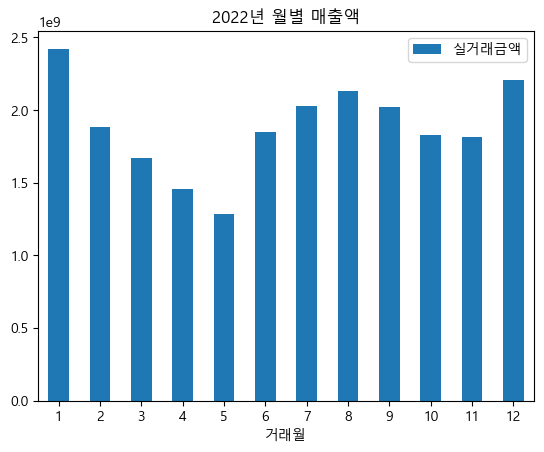

In [17]:
# 거래월로 groupby후 월별 매출합계 시각화
df.groupby(['거래월'])['실거래금액'].sum().plot.bar()
plt.title('2022년 월별 매출액')
plt.legend()
plt.xticks(fontsize=10, rotation=0)
plt.show()

In [16]:
df.거래일자

0         2022. 12. 31. 오후 10:12:33
1          2022. 12. 30. 오후 6:12:57
2         2022. 12. 31. 오후 11:12:15
3         2022. 12. 31. 오후 11:12:03
4         2022. 12. 31. 오후 11:12:10
                    ...            
159323      2022. 1. 1. 오전 12:01:08
159324      2022. 1. 1. 오전 12:01:12
159325      2022. 1. 1. 오전 12:01:21
159326      2022. 1. 2. 오전 11:01:24
159327      2022. 1. 24. 오전 4:01:00
Name: 거래일자, Length: 159328, dtype: object

In [15]:
date_time_format = []
for i in df.거래일자:
    strs = i.split(" ")
    #print(strs)
    strs_date = ""
     
    for j in range(3):
        strs[j] = strs[j].replace(".","")
        strs_date = strs_date + strs[j] + "-"        
    strs_date = strs_date[:-1]
    #print(strs_date)
    
    if strs[3] == '오후':
        strs_s = strs[4].split(":")
        if strs_s[0] != '12':
            strs_s[0] =int(strs_s[0]) + 12
            strs_s_time = str(strs_s[0])+":"+strs_s[1]+":"+strs_s[2]
        #print(strs_s_time)
        
    strs_date = strs_date +" "+ strs_s_time
    #print(strs_date)
    date_time_format.append(strs_date)
#date_time_foramt : pd_to_datetime을 사용하기 위해 정규화    
df['date_time_format'] = date_time_format
#df['date_time_format'].head(5)

#요일별 이름 출력 (영문)
df['day_name'] = pd.to_datetime(df['date_time_format'],format='%Y-%m-%d %H:%M:%S', errors='raise')
#print(df['day_name'].dt.day_name())

0         Saturday
1           Friday
2         Saturday
3         Saturday
4         Saturday
            ...   
159323    Saturday
159324    Saturday
159325    Saturday
159326      Sunday
159327      Monday
Name: day_name, Length: 159328, dtype: object


In [ ]:
df['date_time_format'] = df.date_time_format
df['date_time_format'].value_counts()

2022-1-3 13:01:11      870
2022-1-7 13:01:35      558
2022-2-28 13:02:41     467
2022-7-18 13:07:17     451
2022-4-4 13:04:21      430
                      ... 
2022-7-17 23:07:26       1
2022-7-17 23:07:03       1
2022-11-15 14:11:05      1
2022-7-17 23:07:12       1
2022-1-24 13:01:44       1
Name: date_time_format, Length: 78777, dtype: int64

In [25]:
df.columns

Index(['거래id', '유형', '고객id', '코스ID', '사이트', '포맷', '카테고리', '코스(상품) 이름', '거래일자',
       '쿠폰이름', '판매가격', '결제수단', '실거래금액', '쿠폰할인액', '거래금액', '환불금액', '거래월',
       'date_time_format'],
      dtype='object')